# New Section

In [1]:
import numpy as np
import pandas as pd


In [4]:
import yfinance as yf

In [5]:
pip install yfinance gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [6]:
import yfinance as yf
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [19]:
def predict_stock_prices(stock_symbol, start_date, end_date, future_days=30):

    try:

        # Fetch stock data

        data = yf.download(stock_symbol, start=start_date, end=end_date)

        if data.empty:

            return "No data available for the given stock symbol and date range."



        # Preprocess data

        close_prices = data['Close'].values.reshape(-1, 1)

        scaler = MinMaxScaler(feature_range=(0, 1))

        close_prices_scaled = scaler.fit_transform(close_prices)



        # Create LSTM data

        def create_lstm_data(data, time_steps=1):

            x, y = [], []

            for i in range(len(data) - time_steps):

                x.append(data[i:(i + time_steps), 0])

                y.append(data[i + time_steps, 0])

            return np.array(x), np.array(y)



        time_steps = 10

        x, y = create_lstm_data(close_prices_scaled, time_steps)

        x = np.reshape(x, (x.shape[0], x.shape[1], 1))



        # Build LSTM model

        model = Sequential()

        model.add(LSTM(units=50, return_sequences=True, input_shape=(x.shape[1], 1)))

        model.add(LSTM(units=50))

        model.add(Dense(units=1))

        model.compile(optimizer='adam', loss='mean_squared_error')



        # Train the model

        model.fit(x, y, epochs=10, batch_size=32, verbose=0)



        # Predict future prices iteratively

        last_prices = close_prices[-time_steps:]

        last_prices_scaled = scaler.transform(last_prices.reshape(-1, 1))



        future_predictions = []

        input_sequence = last_prices_scaled.copy()



        for _ in range(future_days):

            x_pred = np.reshape(input_sequence, (1, time_steps, 1))

            predicted_scaled = model.predict(x_pred, verbose=0)

            future_predictions.append(predicted_scaled[0, 0])

            # Update input sequence with the new prediction

            input_sequence = np.append(input_sequence[1:], predicted_scaled, axis=0)



        # Scale predictions back to original values

        future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))



        # Prepare future dates and predictions

        future_dates = pd.date_range(start=pd.to_datetime(end_date) + pd.Timedelta(days=1), periods=future_days)

        future_data = pd.DataFrame({'Date': future_dates, 'Predicted Price': future_predictions.flatten()})



        return future_data

    except Exception as e:

        return str(e)



In [20]:
def gradio_interface(stock_symbol, start_date, end_date, future_days):

    prediction = predict_stock_prices(stock_symbol, start_date, end_date, future_days)

    return prediction



# Set up Gradio UI

inputs = [

    gr.Textbox(label="Stock Symbol", placeholder="e.g., AAPL"),

    gr.Textbox(label="Start Date", placeholder="YYYY-MM-DD"),

    gr.Textbox(label="End Date", placeholder="YYYY-MM-DD"),

    gr.Slider(1, 60, value=30, step=1, label="Number of Future Days to Predict")

]

In [21]:
outputs = gr.Dataframe(label="Predicted Stock Prices")

In [22]:
gr.Interface(fn=gradio_interface, inputs=inputs, outputs=outputs, title="Stock Price Prediction").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://266681c099e96ebdb0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1. Choose a time series dataset

In [23]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy  as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import warnings
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
warnings.filterwarnings('ignore')


In [24]:
!pip install yfinance

In [26]:

df_raw = pd.read_csv('https://github.com/zxhdaze/pharmacysale/blob/main/yahoo_stock.csv?raw=true',index_col = 'Date', parse_dates=True)
# Print the contents of the DataFrame
df_raw.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [31]:


##Scrape live
import yfinance as yf
import pandas as pd


# Define the stock ticker and the date range for the data
ticker = "MSFT"  # GOOG, MSFT
start_date = "2023-01-01"
end_date = "2025-01-08"



# Fetch the data
df_raw = yf.download(ticker, start=start_date, end=end_date)



# Print the contents of the DataFrame
print(df_raw.tail())

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2024-12-31  421.500000  426.730011  420.660004  426.100006  13246500
2025-01-02  418.579987  426.070007  414.850006  425.529999  16896500
2025-01-03  423.350006  424.029999  419.540009  421.079987  16662900
2025-01-06  427.850006  434.320007  425.480011  428.000000  20573600
2025-01-07  422.369995  430.649994  420.799988  429.000000  18139100


In [33]:
df_raw = df_raw.droplevel("Ticker",axis=1)

df_raw = df_raw.reset_index()

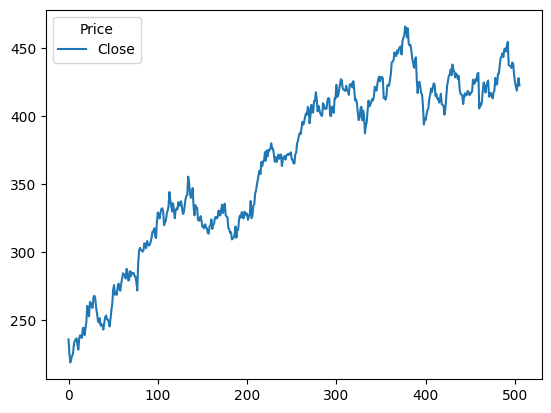

In [37]:
#visually inspect the stock prices over time

fig, ax = plt.subplots()

yahoo.plot(ax=ax)

plt.show()

In [39]:
yahoo = df_raw.loc[:,['Close']].copy()
yahoo.head()

Price,Close
0,235.711700
1,225.400955
2,218.720535
3,221.298248
4,223.452896


In [40]:
result = adfuller(yahoo['Close'])
print("ADF Statistic: {:.4f}".format(result[0]))
print("p-value: {:.4f}".format(result[1]))
print("Critical Values:")
for key, value in result[4].items():
    print("\t{}: {:.4f}".format(key, value))

ADF Statistic: -2.2626
p-value: 0.1843
Critical Values:
	1%: -3.4434
	5%: -2.8673
	10%: -2.5698


In [41]:
yahoo_diff = yahoo.diff().dropna()

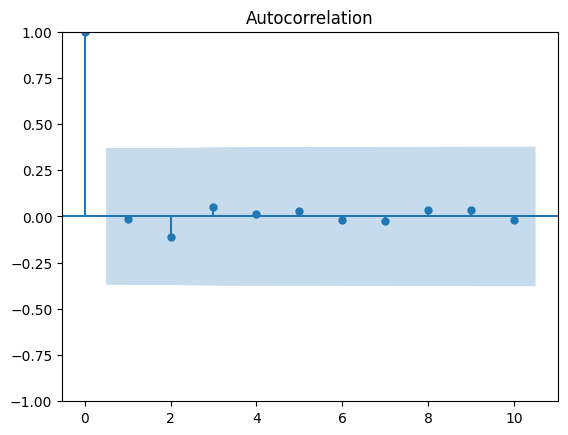

In [45]:
yahoo_acf = acf(yahoo_diff)
acf_plot = plot_acf(yahoo_acf, lags=10)
acf_plot.show()

In [46]:
##Do the ADF test

result = adfuller(yahoo_diff['Close'])

print("ADF Statistic: {:.4f}".format(result[0]))

print("p-value: {:.4f}".format(result[1]))

print("Critical Values:")

for key, value in result[4].items():

    print("\t{}: {:.4f}".format(key, value))



ADF Statistic: -18.1293
p-value: 0.0000
Critical Values:
	1%: -3.4434
	5%: -2.8673
	10%: -2.5698


In [47]:
import itertools

import statsmodels.api as sm

import pandas as pd



# Define the range of p, d, q

p = q = d = range(0, 3)



# Create a list of all possible combinations of p, d, q

pdq = list(itertools.product(p, d, q))



# Load your time series data

# Replace 'your_data' with your actual data

y = yahoo_diff  # Ensure this is a stationary time series



# Perform grid search

best_aic = float('inf')

best_order = None

for order in pdq:

    try:

        model = sm.tsa.ARIMA(y, order=order)

        results = model.fit()

        if results.aic < best_aic:

            best_aic = results.aic

            best_order = order

    except:

        continue



print(f"Best order: {best_order} with AIC: {best_aic}")

Best order: (2, 0, 0) with AIC: 3058.9691405471144


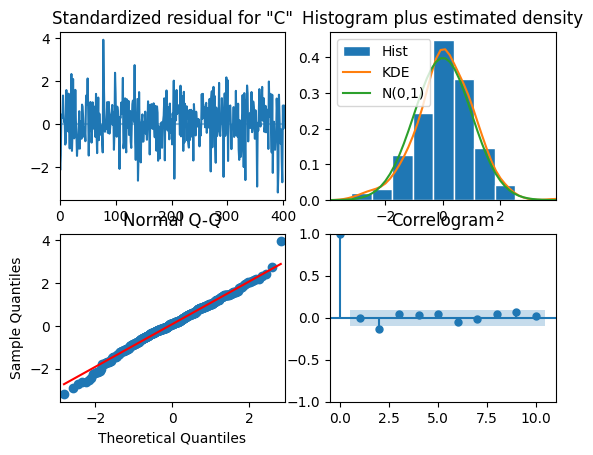

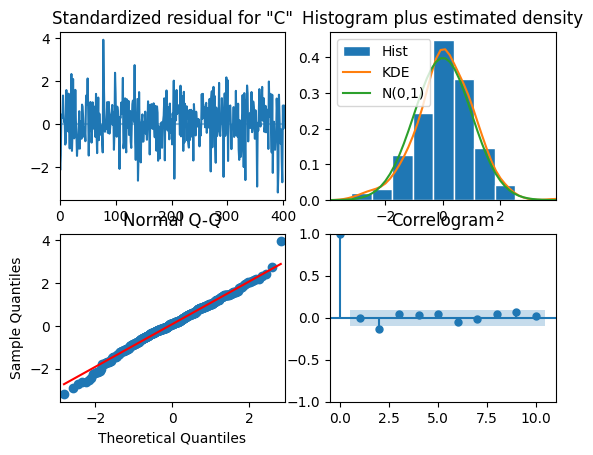

In [48]:
from statsmodels.tsa.arima.model import ARIMA

from tqdm.notebook import tqdm


# Fit the best model

best_order = (2,0,0)



train_size = int(len(yahoo) * 0.8)

yahoo_train, yahoo_test = yahoo[:train_size], yahoo[train_size:]



#yahoo_train=yahoo[:-10]

#yahoo_test=yahoo[-10:]

model = ARIMA(yahoo_train, order=best_order)

model_fit = model.fit()







model_fit.summary()





model_fit.plot_diagnostics()

In [49]:
forecast_values = model_fit.forecast(steps=len(yahoo_test),alpha=0.05)

print(forecast_values)

forecast_values.shape

404    405.148103
405    405.045314
406    404.942443
407    404.839770
408    404.737290
          ...    
501    396.002153
502    395.916285
503    395.830580
504    395.745035
505    395.659651
Name: predicted_mean, Length: 102, dtype: float64


(102,)

In [50]:
from sklearn.metrics import mean_absolute_error



actual_values = yahoo_test

print(actual_values)

mae = mean_absolute_error(actual_values, forecast_values)







# To calculate Mean Squared Error (MSE) or Root Mean Squared Error (RMSE), we can use the following code:



from sklearn.metrics import mean_squared_error



actual_values = yahoo_test

mse = mean_squared_error(actual_values, forecast_values)

rmse = np.sqrt(mse)



Price       Close
404    412.439575
405    415.278748
406    420.188934
407    417.634033
408    420.687927
..            ...
501    421.500000
502    418.579987
503    423.350006
504    427.850006
505    422.369995

[102 rows x 1 columns]


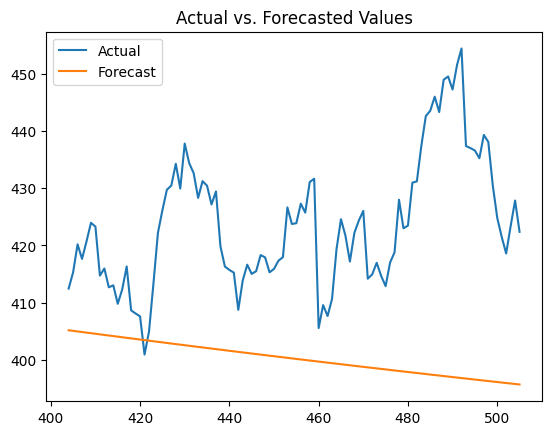

In [51]:




# Plotting actual vs. forecasted values:



import matplotlib.pyplot as plt



plt.plot(actual_values, label='Actual')

plt.plot(forecast_values, label='Forecast')

plt.legend()

plt.title('Actual vs. Forecasted Values')

plt.show()





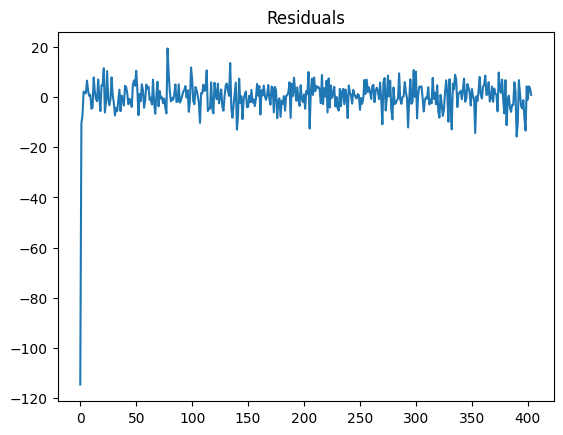

In [52]:


# Plotting residuals:

residuals = model_fit.resid



plt.plot(residuals)

plt.title('Residuals')

plt.show()



In [53]:
# Fit the best model

best_order = (2,2,2)



train_size = int(len(yahoo) * 0.8)

yahoo_train, yahoo_test = yahoo[:train_size], yahoo[train_size:]



#yahoo_train=yahoo[:-10]

#yahoo_test=yahoo[-10:]

model = ARIMA(yahoo_train, order=best_order)

model_fit = model.fit()





model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  404
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1210.059
Date:                Fri, 10 Jan 2025   AIC                           2430.118
Time:                        07:14:39   BIC                           2450.100
Sample:                             0   HQIC                          2438.030
                                - 404                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2984      0.359     -0.832      0.406      -1.002       0.405
ar.L2         -0.1415      0.050     -2.805      0.005      -0.240      -0.043
ma.L1         -0.7234      0.357     -2.025      0.043      -1.424      -0.023
ma.L2         -0.2731      0.359     -0.760      0.447      -0.978       0.431
sigma2        23.7833      1.470     16.185      0.000      20.903      26.664
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 8.17
Prob(Q):                              0.91   Prob(JB):                         0.02
Heteroskedasticity (H):               1.25   Skew:                            -0.16
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

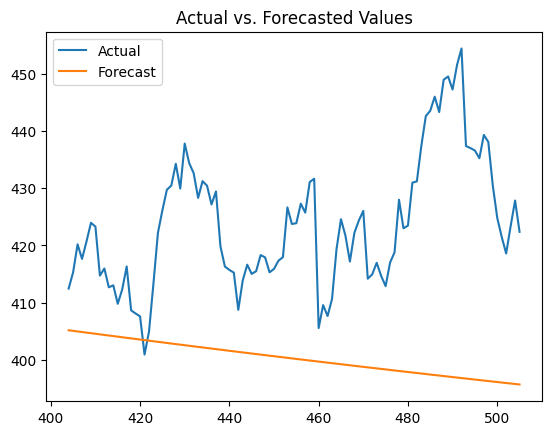

In [54]:


import matplotlib.pyplot as plt



plt.plot(actual_values, label='Actual')

plt.plot(forecast_values, label='Forecast')

plt.legend()

plt.title('Actual vs. Forecasted Values')

plt.show()